# Basic

In [1]:
import pandas as pd
import numpy as np
import brightway2 as bw
from lci_to_bw2 import *

In [2]:
list(bw.projects)

[Project: default,
 Project: advlca20,
 Project: learning1,
 Project: learning2,
 Project: learning3,
 Project: bw2_with_Rizal,
 Project: bw2_Rizal]

In [3]:
list(bw.projects)

[Project: default,
 Project: advlca20,
 Project: learning1,
 Project: learning2,
 Project: learning3,
 Project: bw2_with_Rizal,
 Project: bw2_Rizal]

In [4]:
bw.projects.set_current('bw2_Rizal')

In [5]:
bw.databases

Databases dictionary with 3 object(s):
	biosphere3
	ecoinvent 3.6 conseq
	exldb

In [6]:
bw.bw2setup()

Biosphere database already present!!! No setup is needed


In [7]:
bw.bw2setup()

Biosphere database already present!!! No setup is needed


In [8]:
bw.databases

Databases dictionary with 3 object(s):
	biosphere3
	ecoinvent 3.6 conseq
	exldb

In [9]:
bw.projects.set_current('bw2_Rizal') # Find a project where there is ecoinvent 3.6 conseq
bw.databases

Databases dictionary with 3 object(s):
	biosphere3
	ecoinvent 3.6 conseq
	exldb

# How to import database

In [10]:
# Import ecoinvent

# You need to chenge the line below with the directory where you have saved ecoinvent
ei36dir = "/Users/rizal/Downloads/ecoinvent 3.6_consequential_ecoSpold02/datasets"

if 'ecoinvent 3.6 conseq' in bw.databases:
    print("Database has already been imported")
else:
    ei36 = bw.SingleOutputEcospold2Importer(ei36dir, 'ecoinvent 3.6 conseq') # You can give it another name of course
    ei36.apply_strategies()
    ei36.statistics()


ei36.write_database() # This will take some time.

Database has already been imported


NameError: name 'ei36' is not defined

In [ ]:
bw.databases

In [11]:
activity_name = 'sand'

In [12]:
for activity in bw.Database("ecoinvent 3.6 conseq").search(activity_name):
    print (activity)
    print (activity['code'])
    

'market for sand' (kilogram, BR, None)
cc9f26d341597af3c863f00dc0d42d53
'market for sand' (kilogram, CH, None)
90b65e13ce4cacc42dac372dd476ec03
'silica sand production' (kilogram, DE, None)
175368ebe8dc8153011961ac2cdabe4f
'silica sand production' (kilogram, RoW, None)
8aa8d73f2a127bf9bcbaeb862b288579
'gravel and sand quarry operation' (kilogram, RoW, None)
7c65895fa3115af9ca7d329943158b31
'gravel and sand quarry operation' (kilogram, CH, None)
2b552a4b92fe02ac509a6e8d58748bae
'market for sand' (kilogram, IN, None)
473b3eb53e46eff603e86528fea8b633
'market for sand' (kilogram, RoW, None)
8bd3d9acd087ae0b13afb156b79f8386
'sand quarry operation, extraction from river bed' (kilogram, IN, None)
7a8606f877fe4f7264e49a5c69292f57
'sand quarry operation, extraction from river bed' (kilogram, BR, None)
cbccc2a2fbe316cf95a84f2429eae83f
'sand quarry operation, open pit mine' (kilogram, BR, None)
a99b8739ecdf2485b3041b12c46347d6
'sand quarry operation, extraction from river bed' (kilogram, RoW, Non

# How to import excel file

In [13]:
#importing excel file
my_db = pd.read_csv('test_db_excel_w_ecoinvent (2).csv', header = 0, sep = ",") # using csv file avoids encoding problem
my_db.head()

,Activity database,Activity code,Activity name,Activity unit,Activity type,Exchange database,Exchange input,Exchange amount,Exchange unit,Exchange type,Exchange uncertainty type,Exchange loc,Exchange scale,Exchange negative,Notes
0,exldb,Precast concrete production,Precast concrete production,ton,process,exldb,Precast concrete production,1.0,ton,production,NaN,NaN,NaN,NaN,NaN
1,exldb,Precast concrete production,Precast concrete production,ton,process,ecoinvent 3.6 conseq,0a3b786bbd504c44b80c8ec48a53738d,168.5,kilogram,technosphere,NaN,NaN,NaN,NaN,"market for cement, Portland (RoW)"
2,exldb,Precast concrete production,Precast concrete production,ton,process,ecoinvent 3.6 conseq,3d316bddb5377fac9ceb37f0af9da8bf,7.0,kilogram,technosphere,NaN,NaN,NaN,NaN,"market for limestone, crushed, for mill (RoW)"
3,exldb,Precast concrete production,Precast concrete production,ton,process,ecoinvent 3.6 conseq,8bd3d9acd087ae0b13afb156b79f8386,357.7,kilogram,technosphere,NaN,NaN,NaN,NaN,market for sand (RoW)
4,exldb,Precast concrete production,Precast concrete production,ton,process,ecoinvent 3.6 conseq,e8142d32b9137b2dca06fe56792a690a,42.9,kilogram,technosphere,NaN,NaN,NaN,NaN,market for reinforcing steel (GLO)


In [14]:
# clean up a bit
my_db = my_db.drop('Notes', 1)  # remove the columns not needed
my_db['Exchange uncertainty type'] = my_db['Exchange uncertainty type'].fillna(0).astype(int) # uncertainty as integers
# Note: to avoid having both nan and values in the uncertainty column I use zero as default
my_db.head()

,Activity database,Activity code,Activity name,Activity unit,Activity type,Exchange database,Exchange input,Exchange amount,Exchange unit,Exchange type,Exchange uncertainty type,Exchange loc,Exchange scale,Exchange negative
0,exldb,Precast concrete production,Precast concrete production,ton,process,exldb,Precast concrete production,1.0,ton,production,0,NaN,NaN,NaN
1,exldb,Precast concrete production,Precast concrete production,ton,process,ecoinvent 3.6 conseq,0a3b786bbd504c44b80c8ec48a53738d,168.5,kilogram,technosphere,0,NaN,NaN,NaN
2,exldb,Precast concrete production,Precast concrete production,ton,process,ecoinvent 3.6 conseq,3d316bddb5377fac9ceb37f0af9da8bf,7.0,kilogram,technosphere,0,NaN,NaN,NaN
3,exldb,Precast concrete production,Precast concrete production,ton,process,ecoinvent 3.6 conseq,8bd3d9acd087ae0b13afb156b79f8386,357.7,kilogram,technosphere,0,NaN,NaN,NaN
4,exldb,Precast concrete production,Precast concrete production,ton,process,ecoinvent 3.6 conseq,e8142d32b9137b2dca06fe56792a690a,42.9,kilogram,technosphere,0,NaN,NaN,NaN


In [15]:
from lci_to_bw2 import *

In [16]:
# Create a dict that can be written as database
bw2_db = lci_to_bw2(my_db) # a function from the lci_to_bw2 module
bw2_db

{('exldb',
  'Precast concrete production'): {'name': 'Precast concrete production', 'unit': 'ton', 'type': 'process', 'exchanges': [{'input': ('exldb',
     'Precast concrete production'),
    'amount': 1.0,
    'unit': 'ton',
    'type': 'production',
    'uncertainty type': 0},
   {'input': ('ecoinvent 3.6 conseq', '0a3b786bbd504c44b80c8ec48a53738d'),
    'amount': 168.5,
    'unit': 'kilogram',
    'type': 'technosphere',
    'uncertainty type': 0},
   {'input': ('ecoinvent 3.6 conseq', '3d316bddb5377fac9ceb37f0af9da8bf'),
    'amount': 7.0,
    'unit': 'kilogram',
    'type': 'technosphere',
    'uncertainty type': 0},
   {'input': ('ecoinvent 3.6 conseq', '8bd3d9acd087ae0b13afb156b79f8386'),
    'amount': 357.7,
    'unit': 'kilogram',
    'type': 'technosphere',
    'uncertainty type': 0},
   {'input': ('ecoinvent 3.6 conseq', 'e8142d32b9137b2dca06fe56792a690a'),
    'amount': 42.9,
    'unit': 'kilogram',
    'type': 'technosphere',
    'uncertainty type': 0},
   {'input': ('ec

In [17]:
bw.databases

Databases dictionary with 3 object(s):
	biosphere3
	ecoinvent 3.6 conseq
	exldb

In [18]:
#our database is named exldb, in case this database already exists, we delete it
if 'exldb' in bw.databases: del bw.databases['exldb']
bw.databases

Databases dictionary with 2 object(s):
	biosphere3
	ecoinvent 3.6 conseq

In [19]:
#writing the database onto the project
t_db = bw.Database('exldb')
t_db.write(bw2_db)

Writing activities to SQLite3 database:
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/26/2020 11:00:58
  Finished: 06/26/2020 11:00:58
  Total time elapsed: 00:00:00
  CPU %: 21.10
  Memory %: 2.00


In [20]:
#check if everything worked (does it contain the original and alternate process?)
[print(act) for act in t_db]  # check more stuff 
print('---------')
[[print(act, exc) for exc in list(act.exchanges())]for act in t_db]  # check more stuff 
print('---------')
[[print(exc.uncertainty) for exc in list(act.exchanges())]for act in t_db]  # check more stuff



'Precast concrete production' (ton, None, None)
---------
'Precast concrete production' (ton, None, None) Exchange: 1.0 ton 'Precast concrete production' (ton, None, None) to 'Precast concrete production' (ton, None, None)>
'Precast concrete production' (ton, None, None) Exchange: 168.5 kilogram 'market for cement, Portland' (kilogram, RoW, None) to 'Precast concrete production' (ton, None, None)>
'Precast concrete production' (ton, None, None) Exchange: 7.0 kilogram 'market for limestone, crushed, for mill' (kilogram, RoW, None) to 'Precast concrete production' (ton, None, None)>
'Precast concrete production' (ton, None, None) Exchange: 357.7 kilogram 'market for sand' (kilogram, RoW, None) to 'Precast concrete production' (ton, None, None)>
'Precast concrete production' (ton, None, None) Exchange: 42.9 kilogram 'market for reinforcing steel' (kilogram, GLO, None) to 'Precast concrete production' (ton, None, None)>
'Precast concrete production' (ton, None, None) Exchange: 0.052386228 

[[None, None, None, None, None, None, None, None, None]]

In [21]:
mymethod = ('IPCC 2013', 'climate change', 'GWP 100a')
pc = t_db.get("Precast concrete production")
functional_unit = {pc: 1}
lca = bw.LCA(functional_unit, mymethod)
lca.lci()
lca.lcia()
print(lca.score)

328.6527129840726


In [22]:
import matplotlib.pyplot as plt

In [23]:
pc = t_db.get('Precast concrete production') 
list(pc.exchanges())

[Exchange: 1.0 ton 'Precast concrete production' (ton, None, None) to 'Precast concrete production' (ton, None, None)>,
 Exchange: 168.5 kilogram 'market for cement, Portland' (kilogram, RoW, None) to 'Precast concrete production' (ton, None, None)>,
 Exchange: 7.0 kilogram 'market for limestone, crushed, for mill' (kilogram, RoW, None) to 'Precast concrete production' (ton, None, None)>,
 Exchange: 357.7 kilogram 'market for sand' (kilogram, RoW, None) to 'Precast concrete production' (ton, None, None)>,
 Exchange: 42.9 kilogram 'market for reinforcing steel' (kilogram, GLO, None) to 'Precast concrete production' (ton, None, None)>,
 Exchange: 0.052386228 kilogram 'market for polystyrene, expandable' (kilogram, GLO, None) to 'Precast concrete production' (ton, None, None)>,
 Exchange: 0.01061883 kilogram 'market for polystyrene, extruded' (kilogram, GLO, None) to 'Precast concrete production' (ton, None, None)>,
 Exchange: -59.4 kilogram 'Gravel, in ground' (kilogram, None, ('natural 

In [24]:
pc = t_db.get('Precast concrete production') 
list(pc.exchanges())

[Exchange: 1.0 ton 'Precast concrete production' (ton, None, None) to 'Precast concrete production' (ton, None, None)>,
 Exchange: 168.5 kilogram 'market for cement, Portland' (kilogram, RoW, None) to 'Precast concrete production' (ton, None, None)>,
 Exchange: 7.0 kilogram 'market for limestone, crushed, for mill' (kilogram, RoW, None) to 'Precast concrete production' (ton, None, None)>,
 Exchange: 357.7 kilogram 'market for sand' (kilogram, RoW, None) to 'Precast concrete production' (ton, None, None)>,
 Exchange: 42.9 kilogram 'market for reinforcing steel' (kilogram, GLO, None) to 'Precast concrete production' (ton, None, None)>,
 Exchange: 0.052386228 kilogram 'market for polystyrene, expandable' (kilogram, GLO, None) to 'Precast concrete production' (ton, None, None)>,
 Exchange: 0.01061883 kilogram 'market for polystyrene, extruded' (kilogram, GLO, None) to 'Precast concrete production' (ton, None, None)>,
 Exchange: -59.4 kilogram 'Gravel, in ground' (kilogram, None, ('natural 

In [25]:
cem_exc = list(pc.exchanges())[1]   # the second exchange = cement production
cem_exc

Exchange: 168.5 kilogram 'market for cement, Portland' (kilogram, RoW, None) to 'Precast concrete production' (ton, None, None)>

In [26]:
# Lognormal distribution first
from stats_arrays import LognormalUncertainty
import numpy as np
cem_exc['uncertainty type'] = LognormalUncertainty.id # this is an integer (not a float)
cem_exc['loc'], cem_exc['scale'] = np.log(cem_exc['amount']), np.log(1.01) 
'''The lognorm dist is defined here two parameters: location and scale 
i.e. by the log of the geometric mean and by the geometric standard dev'''
cem_exc.save() # important

In [27]:
cem_exc.uncertainty

{'uncertainty type': 2,
 'loc': 5.126935749792416,
 'scale': 0.009950330853168092}

In [28]:
cem_exc.as_dict()  # Now uncertainty is included

{'input': ('ecoinvent 3.6 conseq', '0a3b786bbd504c44b80c8ec48a53738d'),
 'amount': 168.5,
 'unit': 'kilogram',
 'type': 'technosphere',
 'uncertainty type': 2,
 'output': ('exldb', 'Precast concrete production'),
 'loc': 5.126935749792416,
 'scale': 0.009950330853168092}

(array([  1.,   5.,  24.,  95., 208., 310., 217., 102.,  34.,   4.]),
 array([161.68022398, 162.90693366, 164.13364334, 165.36035301,
        166.58706269, 167.81377237, 169.04048205, 170.26719173,
        171.4939014 , 172.72061108, 173.94732076]),
 <a list of 10 Patch objects>)

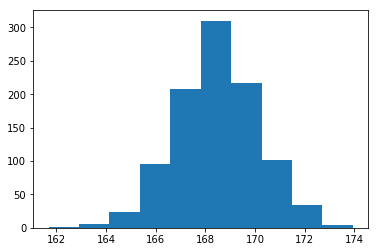

In [29]:
%matplotlib inline
plt.hist(cem_exc.random_sample(n=1000))